In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import math
import src.cleaning_eda

In [3]:
# import functions frpm cleaning_eda script
from src.cleaning_eda import (cleaning_df, get_percentage, percent_barplot, year_count_barplot,multcolumn_groupby,
groupby_columns, create_dictionary, add_list_column, add_column, count_percent_barplot, lifestyle_df,
lifestyle_barplot, bmi_barplot, count_barplot, create_dummies)


In [4]:
df1= pd.read_csv('data/cardio_train.csv', sep= ';')
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cleaning= cleaning_df(df1, 'ap_hi', 370, 0)
cvd= cleaning_df(cleaning, 'ap_lo', 360, 0)
cvd= cleaning_df(cvd, 'height', 250, 0)
cvd= cleaning_df(cvd, 'weight', 600,0)

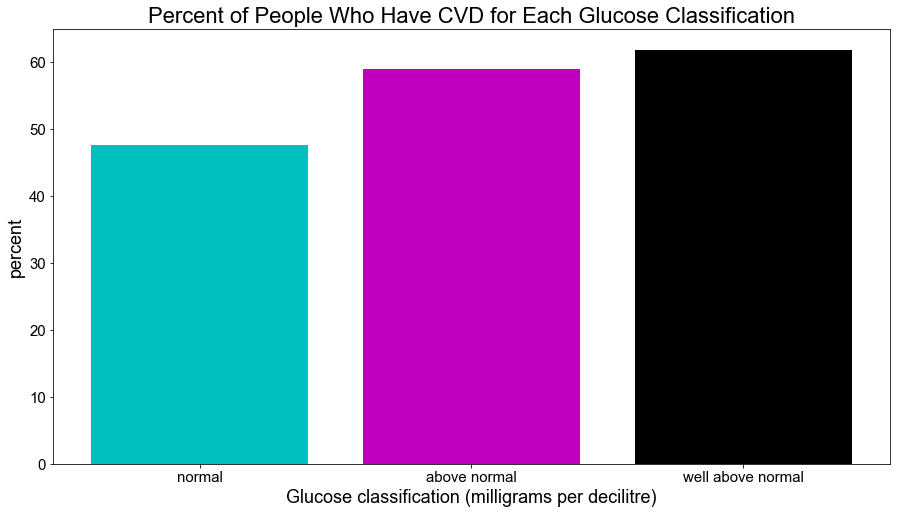

In [6]:
gluc_df = (get_percentage(cvd, 'gluc', 'cardio'))
percent_barplot(gluc_df, 0, 'Glucose classification (milligrams per decilitre)', 'Percent of People Who Have CVD for Each Glucose Classification')

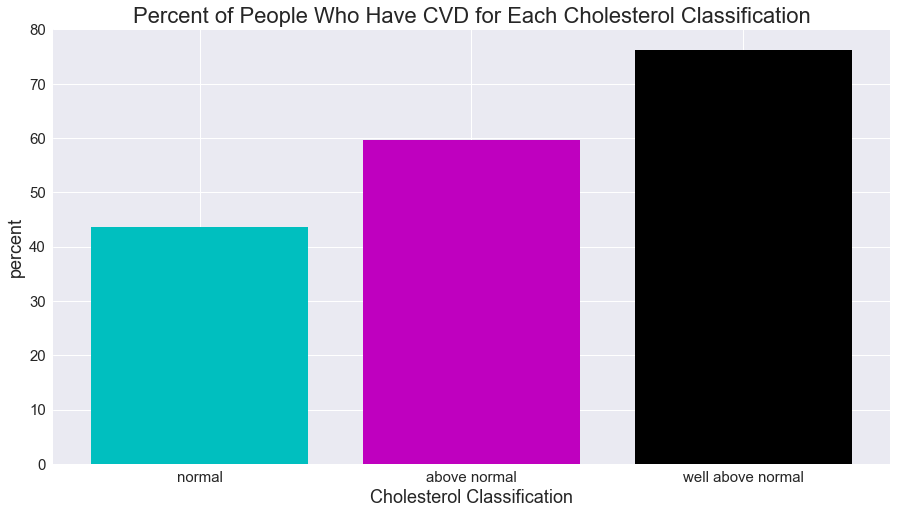

In [7]:
chole_df= (get_percentage(cvd, 'cholesterol', 'cardio'))
percent_barplot(chole_df, 0, 'Cholesterol Classification', 'Percent of People Who Have CVD for Each Cholesterol Classification')



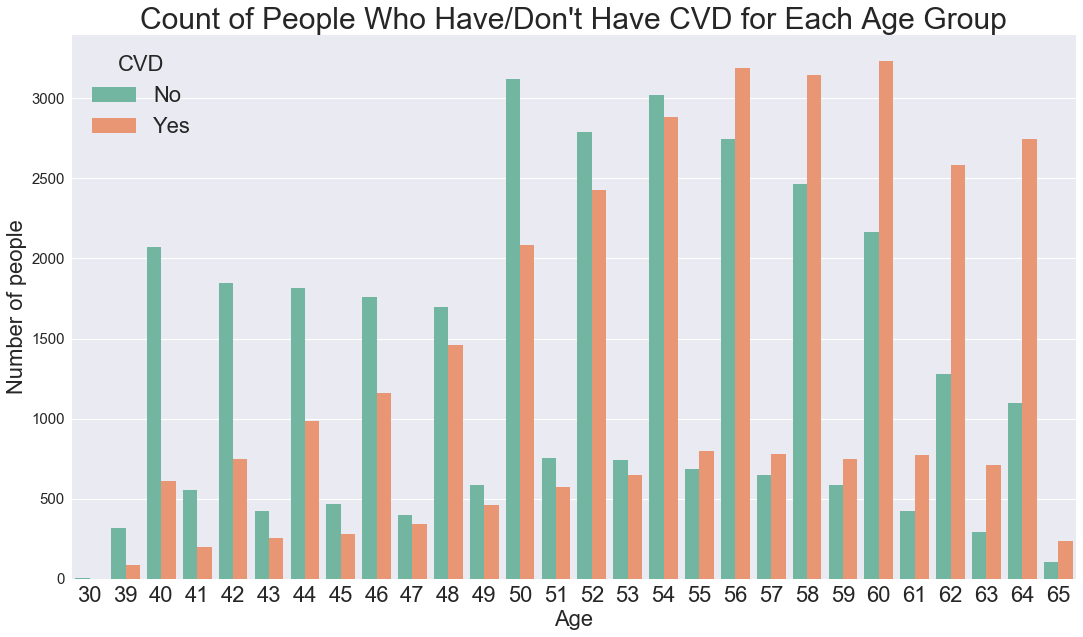

In [8]:
year_count_barplot(cvd, 'years', 'years', 'CVD')

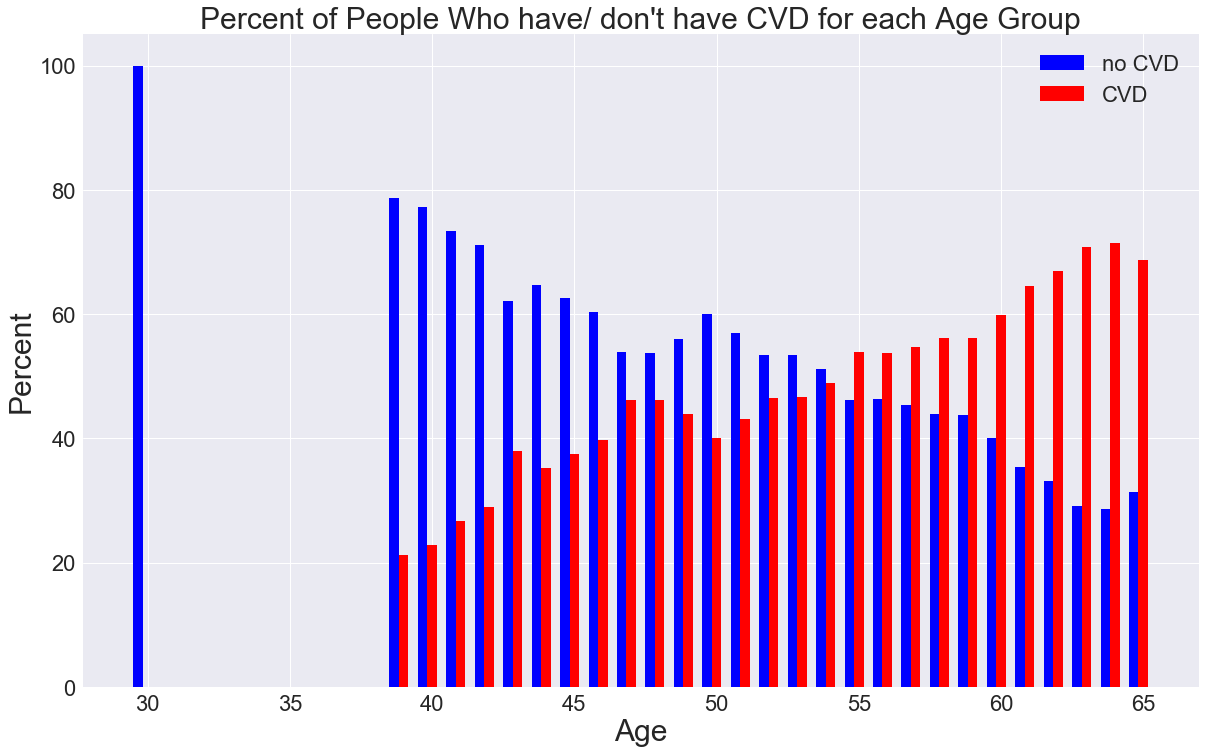

In [9]:
cardio_percent, cardio_total= multcolumn_groupby(cvd,'years', 'cardio' )
dic= (create_dictionary(cardio_total, 'cardio', 'years'))
cardio_ = add_column('years',dic,cardio_percent, 'total_cardio', 'total_percent', 'id')
count_percent_barplot(cardio_)

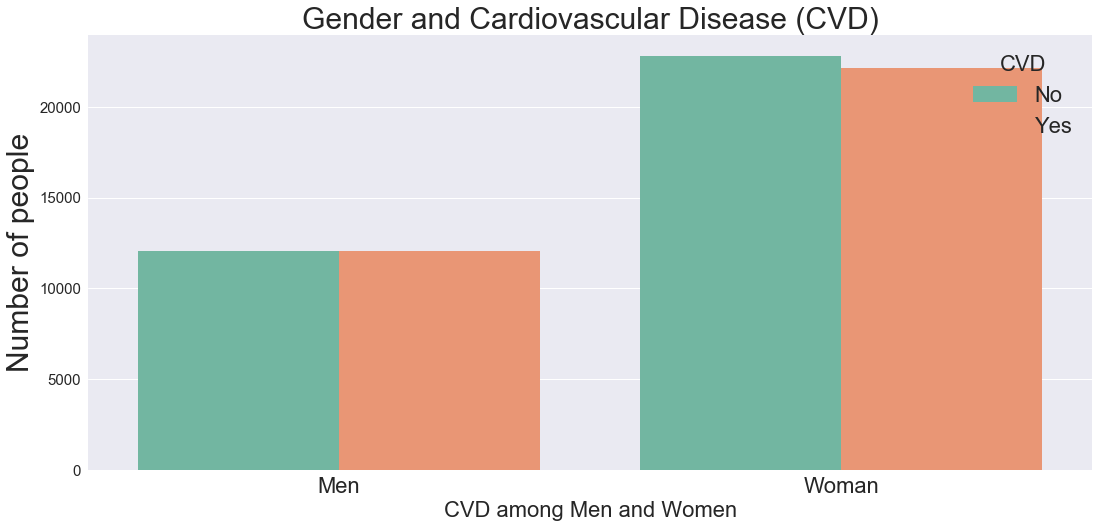

In [10]:
gender= lifestyle_df(cvd, {'cardio': 'CVD'}, 'gender', {1: "Woman", 2: 'Men'})
lifestyle_barplot(gender, 'gender', 'CVD', "CVD among Men and Women", "Gender and Cardiovascular Disease (CVD)")

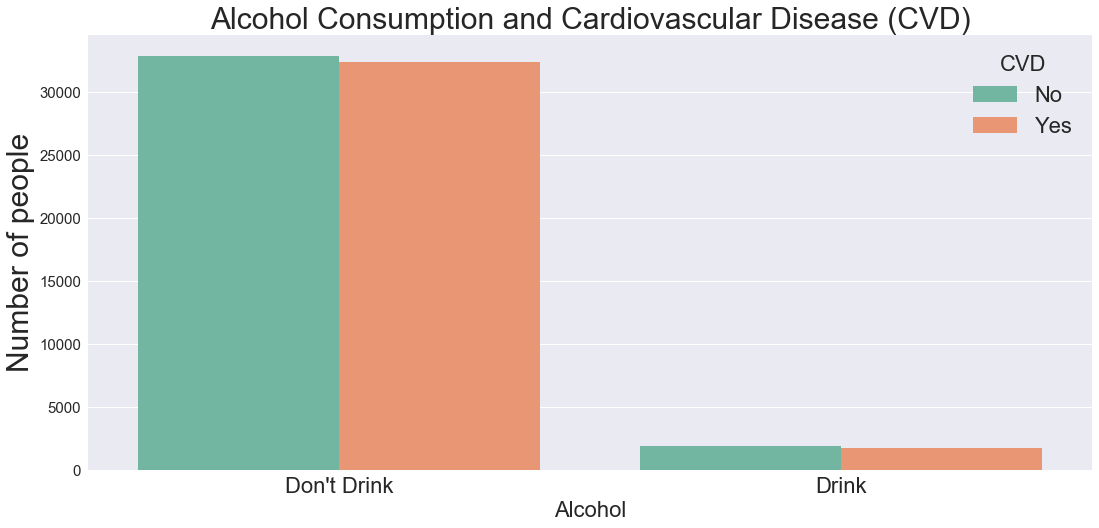

In [11]:
alcohol= lifestyle_df(cvd, {'cardio': 'CVD'}, 'alco', {0: "Don't Drink", 1: "Drink"})

lifestyle_barplot(alcohol, 'alco', 'CVD', 'Alcohol', "Alcohol Consumption and Cardiovascular Disease (CVD)")



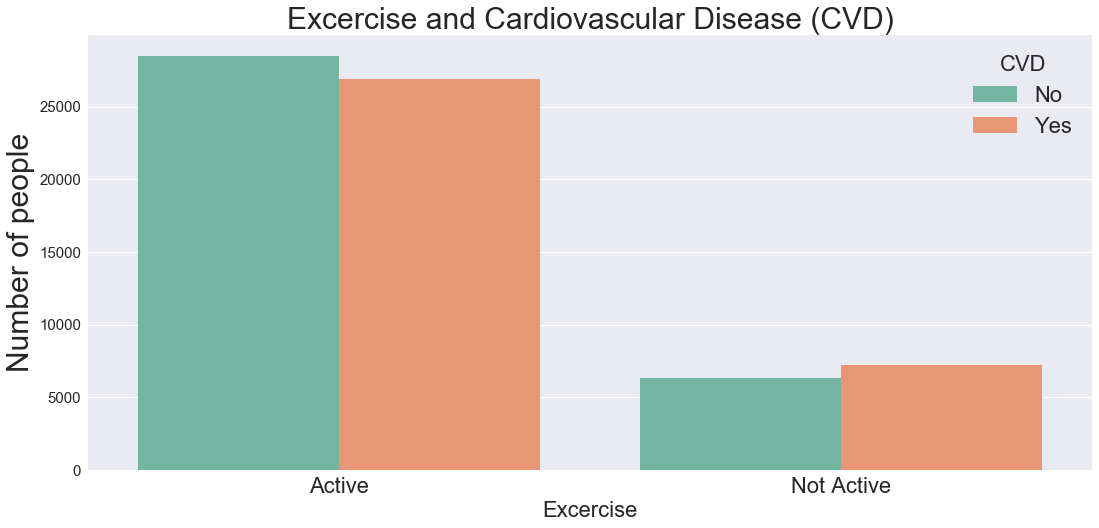

In [12]:
excercise= lifestyle_df(cvd, {'cardio': 'CVD'}, 'active', {0: 'Not Active', 1: "Active"})
lifestyle_barplot(excercise, 'active', 'CVD', 'Excercise', "Excercise and Cardiovascular Disease (CVD)")




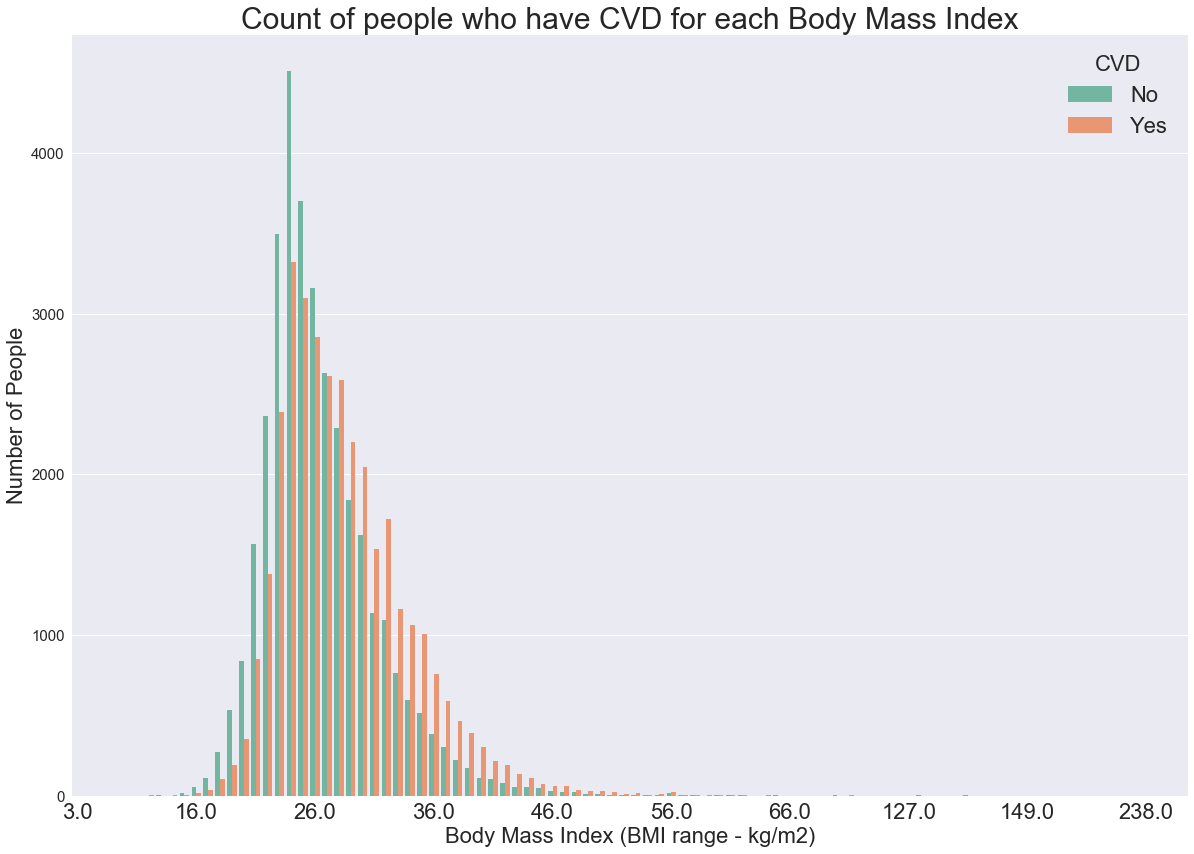

In [13]:
cvd['BMI']= np.round(cvd.weight /((cvd.height/100)**2))

bmi_barplot(cvd)


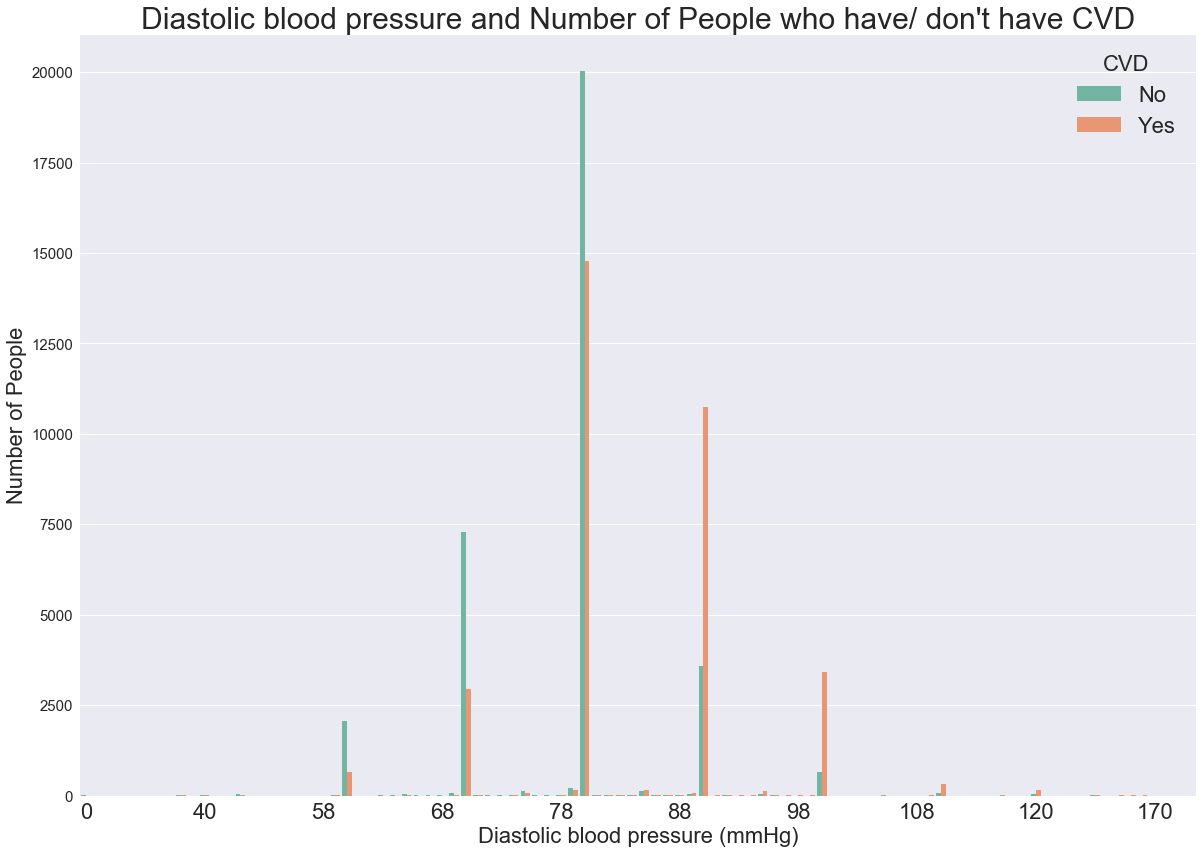

In [14]:
ap_lo_barplot= count_barplot(cvd,'ap_lo', "Diastolic blood pressure and Number of People who have/ don't have CVD",'Diastolic blood pressure (mmHg)')
ap_lo_barplot

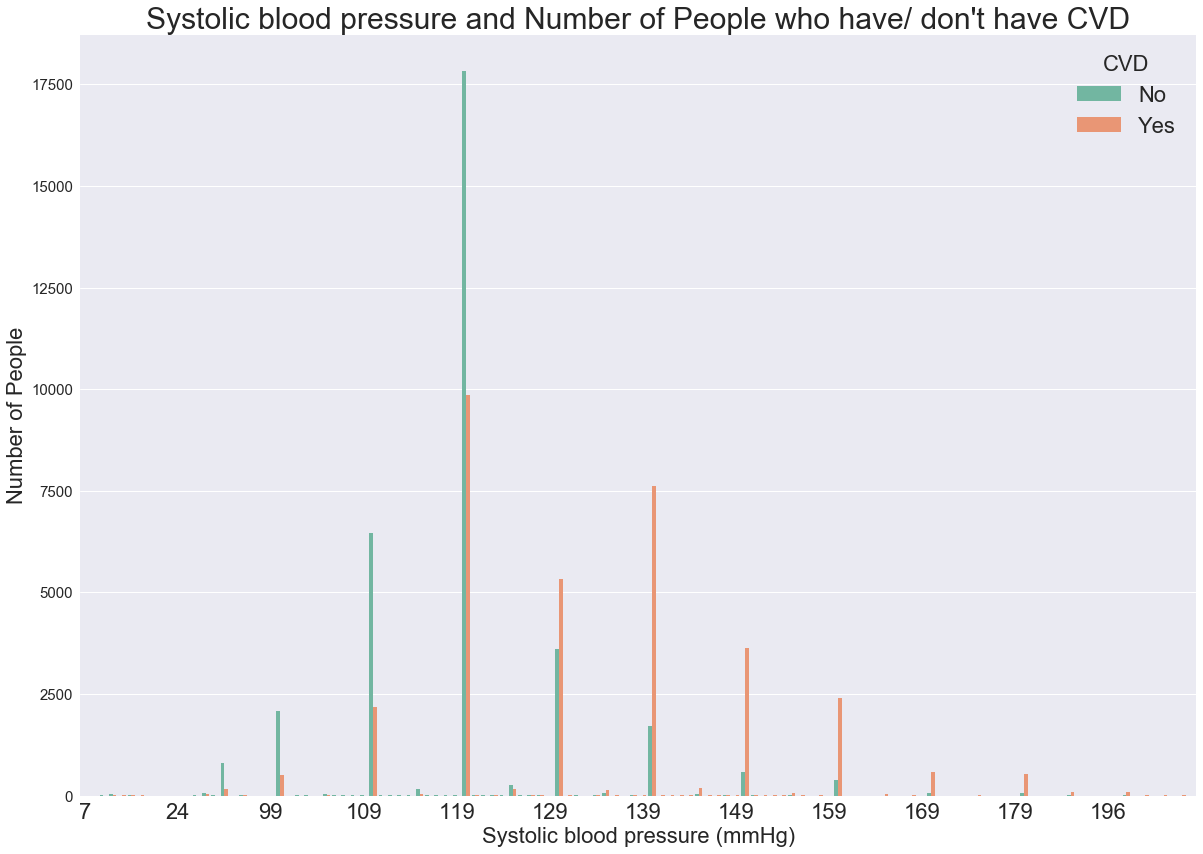

In [15]:
ap_hi_barplot= count_barplot(cvd,'ap_hi', "Systolic blood pressure and Number of People who have/ don't have CVD",'Systolic blood pressure (mmHg)')
ap_hi_barplot

In [16]:
cvd.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,35.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,24.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,29.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.0


### Create Dummies and save final dataframe

In [17]:
cvd= create_dummies(cvd, 'cholesterol')
cvd= create_dummies(cvd, 'gluc')

In [18]:
 # further data engineering for model selection and save the final dataframe 
cvd['gender']= cvd['gender'].map({1: 0, 2: 1})
del cvd['height']
del cvd['weight']
del cvd ['id']
del cvd['years']

cvd.duplicated()
cvd.drop_duplicates(keep = 'first', inplace = True)
cvd.shape

cvd[cvd['ap_hi'] <= cvd['ap_lo']]
cvd= cvd[cvd['ap_hi'] >= cvd['ap_lo']].reset_index(drop=True)
cvd.rename(columns={'ap_hi': 'systolic'}, inplace= True)
cvd.rename(columns= {"ap_lo": 'diastolic'}, inplace= True)
cvd.to_csv('final_df.csv')



In [19]:
cvd.head()

,age,gender,systolic,diastolic,smoke,alco,active,cardio,BMI,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,18393,1,110,80,0,0,1,0,22.0,1,0,0,1,0,0
1,20228,0,140,90,0,0,1,1,35.0,0,0,1,1,0,0
2,18857,0,130,70,0,0,0,1,24.0,0,0,1,1,0,0
3,17623,1,150,100,0,0,1,1,29.0,1,0,0,1,0,0
4,17474,0,100,60,0,0,0,0,23.0,1,0,0,1,0,0
